In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Dataset
df = pd.read_csv('/content/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Fare'].fillna(df['Fare'].mean(), inplace = True)
df.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.50000,0,0,7.8292,Q
1,1,3,female,47.00000,1,0,7.0000,S
2,0,2,male,62.00000,0,0,9.6875,Q
3,0,3,male,27.00000,0,0,8.6625,S
4,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,8.0500,S
414,1,1,female,39.00000,0,0,108.9000,C
415,0,3,male,38.50000,0,0,7.2500,S
416,0,3,male,30.27259,0,0,8.0500,S


In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64


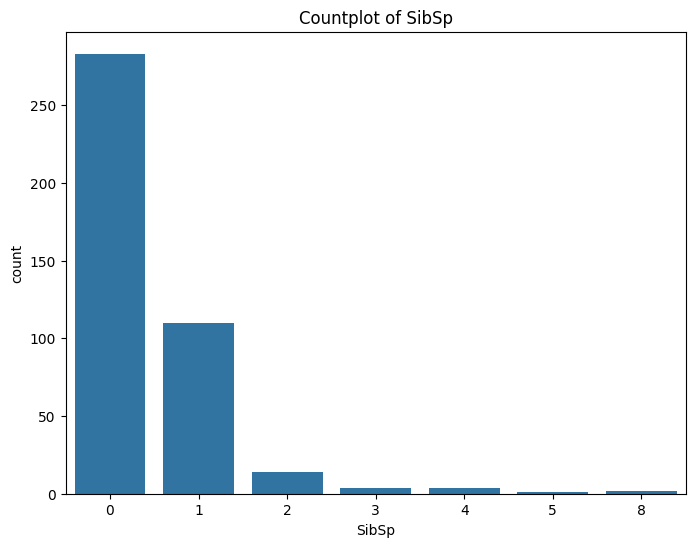

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64


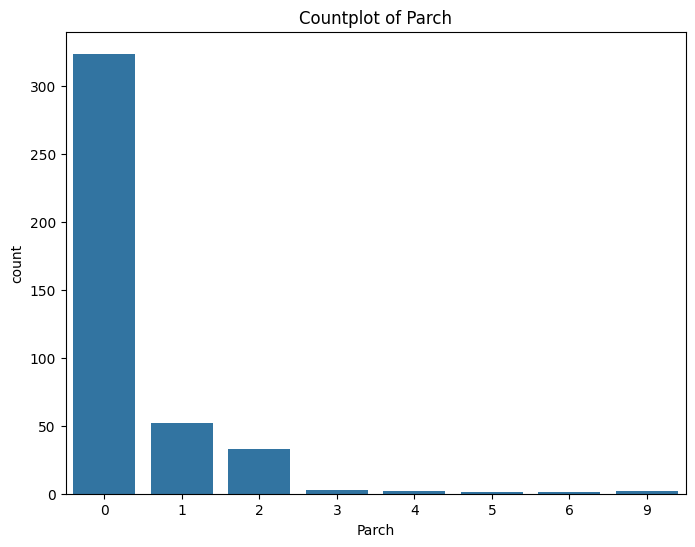

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


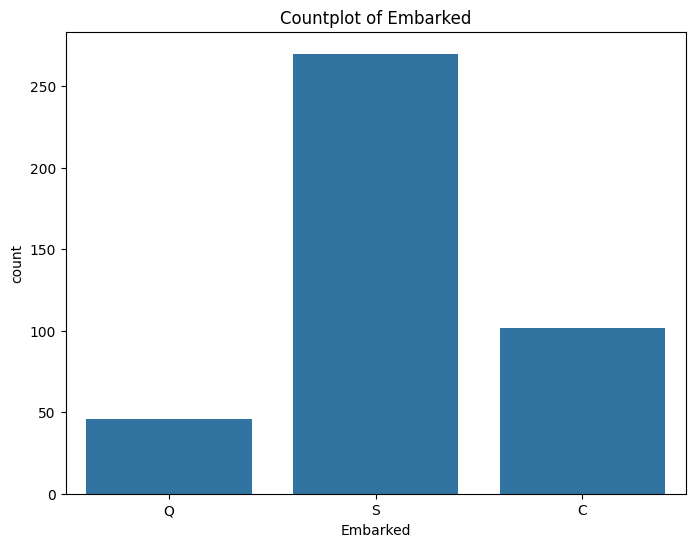

In [ ]:
print(df['SibSp'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='SibSp', data=df)
plt.title('Countplot of SibSp')
plt.show()

print(df['Parch'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='Parch', data=df)
plt.title('Countplot of Parch')
plt.show()

print(df['Embarked'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=df)
plt.title('Countplot of Embarked')
plt.show()

In [ ]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  418 non-null    int64
 1   Pclass    418 non-null    int64
 2   Sex       418 non-null    int64
 3   Age       418 non-null    int64
 4   SibSp     418 non-null    int64
 5   Parch     418 non-null    int64
 6   Fare      418 non-null    int64
 7   Embarked  418 non-null    int64
dtypes: int64(8)
memory usage: 26.2 KB


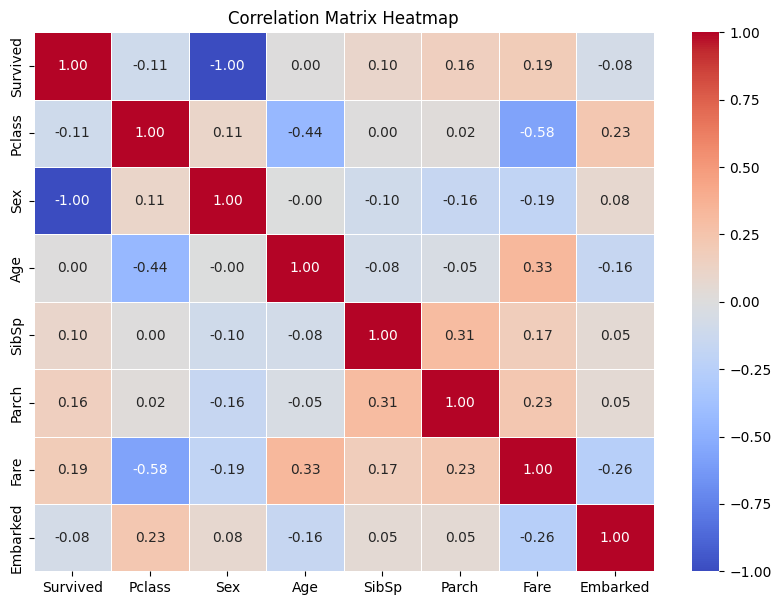

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()
#Graph I.
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
#splitting dataset to x and y
x = df.drop(['Survived'],axis =1).values
y = df['Survived'].values
print(x[0])
print(y[0])

[ 3  1 34  0  0  7  1]
0


In [ ]:
#X and Y split into train set with 80% and test set with 20% of test size
from sklearn.model_selection import train_test_split
# Intentionally reduce the training dataset size
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train[0])
print(x_test[0])

[ 2  1 32  0  0 13  2]
[ 3  1 25  0  0  7  0]


In [ ]:
# The X samples are normalizing to a common scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
print(x_train[0])
print(x_test[0])

[-0.31938196  0.73911859  0.14904822 -0.49831227 -0.43196296 -0.40521521
  0.70783574]
[ 0.90453403  0.82462113 -0.5088759  -0.53605627 -0.30308806 -0.50151018
 -1.68231646]


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [45]:
new_samples=np.array([
    [3, 0, 35, 0, 0, 8.05, 0],
    [1, 1, 25, 1, 2, 150.0, 1],
    [2, 0, 45, 1, 1, 26.25, 0]
])

# Data Preprocessing: Standardize new samples using the same scaler
new_samples_scaled=sc.transform(new_samples)

# Make predictions using different models

rf_predictions=clf.predict(new_samples_scaled)

# Map predicted classes to corresponding flower names
output=np.array(['Survived', 'Not Survived'])
rf_predicted_output=output[rf_predictions]
# Display predictions
for i in range(len(new_samples)):
    print(f"Sample {i+1}:")
    print("RF Prediction:" ,rf_predicted_output[i])
    print()


Sample 1:
RF Prediction: Not Survived

Sample 2:
RF Prediction: Survived

Sample 3:
RF Prediction: Not Survived

